# Titanic: Machine Learning from Disaster
[Kaggle page for this problem](https://www.kaggle.com/c/titanic/data)

*Amir Hossein Binesh*, Amir Kabir University of Tehran

---

## Part 1 : Read data, visualize and preprocess

**Reading the data**

In [1]:
import pandas as pd


# Read train data
train_df = pd.read_csv('train.csv', index_col='PassengerId')
# Read test data and the answers
test_features = pd.read_csv('test.csv', index_col='PassengerId')
test_classes = pd.read_csv('gender_submission.csv', index_col='PassengerId')

# concat test data and answers for integration
test_df = pd.concat([test_features, test_classes], axis = 1)

In [2]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
# Number of features and data for train data
print("Number of features : ", len(train_df.columns))
print("Number of data : ", len(train_df.index))

Number of features :  11
Number of data :  891


In [4]:
# Number of features and data for test data
print("Number of features : ", len(test_df.columns))
print("Number of data : ", len(test_df.index))

Number of features :  11
Number of data :  418


----

**Visualize the data**
        
With a little bit of common sense, and according to Titanic the movie, which I vaguely remember, we examine the features, to get a grasp of the data.
This helps to choose features in next steps.

"Women and children first", that gives a fairly easy clue, sex and age.
The other thing is money, all the Pclass, Cabin, Fare and Ticket features point to this very specific matter, and also that lines up with the movie, so we have to have an eye on that.

By the way, I couldn't find Jack in the data set, so maybe it's an alternative reality, who knows?

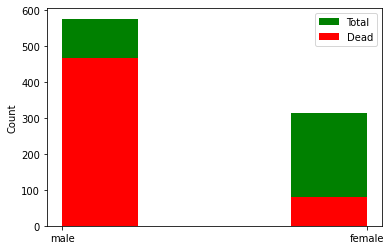

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Fraction of survival and death for men and women
dead_df = train_df[train_df['Survived'] == 0]
alive_df = train_df[train_df['Survived'] == 1]
plt.hist(train_df['Sex'].values, histtype='bar', bins=4, color = "green")
plt.hist(dead_df['Sex'].values, histtype='bar', bins=4, color = "red")


plt.ylabel('Count')
plt.legend(('Total', 'Dead'))

plt.show()

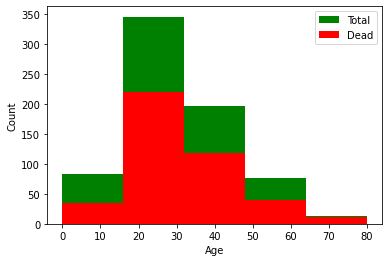

In [6]:
plt.hist(train_df['Age'].dropna(axis = 0).values, bins=5, color = "green", range = (0, 80))
plt.hist(dead_df['Age'].dropna(axis = 0).values, bins=5, color = "red", range = (0, 80))


plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(('Total', 'Dead'))

plt.show()

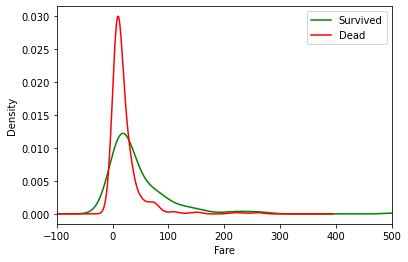

In [7]:
ax = pd.DataFrame(alive_df['Fare']).plot(kind='density', color = "green")
ax.set_xlim(-100, 500)
pd.DataFrame(dead_df['Fare']).plot(ax=ax, kind='density', color = "red")

plt.ylabel('Density')
plt.xlabel('Fare')
plt.legend(('Survived', 'Dead'))
plt.rcParams["figure.figsize"] = [10,5]
plt.show()


---

**Data Preprocessing**

As mentioned before, all the Pclass, Cabin, Fare and Ticket features, can sum up into one feature. The cabin NaN is probably for workers, we can make sure with a correlation method with fare, which is done below.

So the Pclass and fare can represent the wealth.

The other features are irrelevant to me. We can use Viktor Frankl teachings to add SibSp and Parch, but I don't think, that's gonna work here.

In [8]:
train_df.corr(method ='kendall')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


Correlation(Pclass, Fare) = -0.57, which is good, but not enough to ignore one over another.

In [9]:
# Count null data
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Count null data for test data
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

In [11]:
# Use mean of age for NaN ages
mean_age = round(train_df.mean(axis = 0, skipna = True)['Age'])
train_df['Age'] = train_df['Age'].fillna(mean_age)
mean_age = round(test_df.mean(axis = 0, skipna = True)['Age'])
test_df['Age'] = test_df['Age'].fillna(mean_age)

# Set Other NaNs
train_df['Cabin'] = train_df['Cabin'].fillna("NoRoom")
train_df['Embarked'] = train_df['Embarked'].fillna("U")
test_df['Cabin'] = test_df['Cabin'].fillna("NoRoom")
test_df['Embarked'] = test_df['Embarked'].fillna("U")

# Test data had one NaN for fare, use mean to replace it
mean_fare = round(test_df.mean(axis = 0, skipna = True)['Fare'])
test_df['Fare'] = test_df['Fare'].fillna(mean_fare)

In [12]:
test_df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

In [13]:
# This piece of code, make a column into a numeric column
# Since we decided to not use Cabin, I comment this out

# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# enc.fit(train_df['Cabin'])
# train_df['Cabin'] = enc.transform(train_df['Cabin'])

train_df['Sex'].replace(['female', 'male'],[-1, 1], inplace=True)
train_df['Embarked'].replace(['S', 'C', 'Q', 'U'], [0, 1, 2, 1], inplace=True)
train_df['Survived'].replace([0, 1], [-1, 1], inplace = True)

test_df['Sex'].replace(['female', 'male'],[0, 1], inplace=True)
test_df['Embarked'].replace(['S', 'C', 'Q', 'U'], [0, 1, 2, 1], inplace=True)
test_df['Survived'].replace([0, 1], [-1, 1], inplace = True)

In [14]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,-1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NoRoom,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",-1,26.0,0,0,STON/O2. 3101282,7.9250,NoRoom,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1,35.0,1,0,113803,53.1000,C123,0
5,-1,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NoRoom,0
...,...,...,...,...,...,...,...,...,...,...,...
887,-1,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NoRoom,0
888,1,1,"Graham, Miss. Margaret Edith",-1,19.0,0,0,112053,30.0000,B42,0
889,-1,3,"Johnston, Miss. Catherine Helen ""Carrie""",-1,30.0,1,2,W./C. 6607,23.4500,NoRoom,0


---

## Part 2 : Training and testing the decision tree

**Training**

In [20]:
from sklearn import tree

# == SETTINGS ==
MAX_DEPTH = 3
CRITERION = "gini"

features = ['Sex', 'Age', 'Fare', 'Pclass']
X = train_df[features]
y = train_df['Survived']

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=MAX_DEPTH, criterion=CRITERION)
clf = clf.fit(X, y)

**Accuracy Calculation**

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y, clf.predict(train_df[features]))

0.8215488215488216

**Tree Visualization**

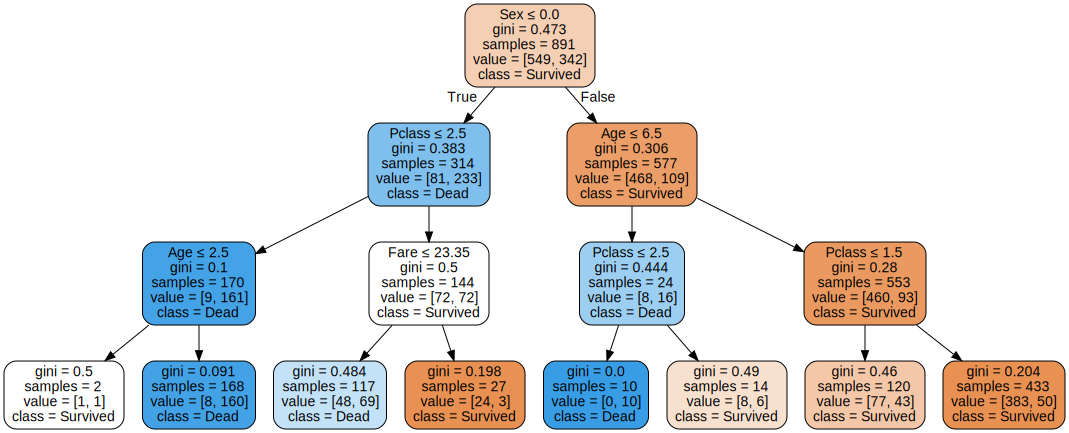

In [22]:
import graphviz

file_name = "Result-" + str(MAX_DEPTH) + "-" + CRITERION

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render(file_name)
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     class_names=['Survived', 'Dead'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Testing**

In [23]:
X = test_df[features]
y = test_df['Survived']
predicc = clf.predict(X)

In [24]:
accuracy_score(y, predicc)

0.9760765550239234